In [ ]:
import sys
sys.path.append("/Users/kim/Desktop/repos/Philippines_Visitor")

import pandas as pd
from db_conn import get_engine
from prophet import Prophet


In [ ]:
query = """
SELECT
    year, 
    sum(total_visitors) as Total_Visitors
FROM 
    yearly_visitors yv 
GROUP BY year
ORDER BY year;
"""

def get_visitors_per_year():
    engine = get_engine()
    df = pd.read_sql(query, engine)
    return df

In [ ]:
total_df = get_visitors_per_year()
total_df

For yearly data, we have a few options:
- Linear Regression (good if growth is roughly linear)
- ARIMA (for time series trends)
- Prophet (from Meta/Facebook, handles trends and seasonality nicely)

Since your dataset is small and yearly, I recommend Prophet for simplicity and accuracy.

In [ ]:
# Prophet expects columns: ds (date), y (value)
df_prophet = total_df.reset_index().rename(columns={'year': 'ds', 'total_visitors': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')
df_prophet

In [ ]:

# Create and fit the model
model = Prophet(yearly_seasonality=True, growth='linear')
model.fit(df_prophet)

# Forecast next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [ ]:
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt

# Using matplotlib
model.plot(forecast)
plt.show()

Predicted peak visitors: 125652303 in year 2034


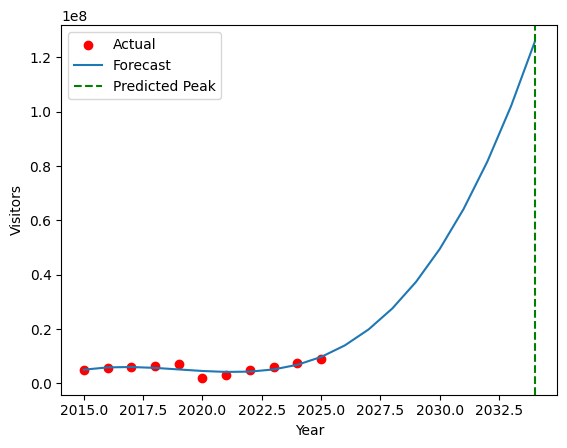

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Your data
years = np.array([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025]).reshape(-1,1)
visitors = np.array([5000000,5500000,6000000,6500000,7000000,2000000,3000000,5000000,6000000,7500000,9000000])

# Use polynomial regression (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(years)

model = LinearRegression()
model.fit(X_poly, visitors)

# Forecast next 10 years
future_years = np.array(range(2015, 2035)).reshape(-1,1)
future_poly = poly.transform(future_years)
forecast_visitors = model.predict(future_poly)

# Find the peak
peak_index = np.argmax(forecast_visitors)
peak_year = future_years[peak_index][0]
peak_value = forecast_visitors[peak_index]

print(f"Predicted peak visitors: {int(peak_value)} in year {peak_year}")

# Plot
plt.scatter(years, visitors, color='red', label='Actual')
plt.plot(future_years, forecast_visitors, label='Forecast')
plt.axvline(x=peak_year, color='green', linestyle='--', label='Predicted Peak')
plt.xlabel('Year')
plt.ylabel('Visitors')
plt.legend()
plt.show()